# Algorithm & Metrics Review

## Learning Objectives

After this lesson, students will be able to:
- **Describe & Compare**  3 algorithms (linear regression, logistic regression & KNN)
- **Describe** what confusion matrix is and what it is used for in the context of model evaluation
    - Describe the components of a confusion matrix
    - Interpret a confusion matrix
    - Create a Confusion Matrix using sklearn
- **Explain** Metrics derived from confusion matrix 
    - Evaluate classification models using the evaluation metrics appropriate for a specific problem 
    - Define precision and recall 
    - Define sensitivity and specificity
    - Define accuracy, precision, and F1 score 
- **Explain** ROC & AUC, what they measure and how to use them
- **Build & Compare** 
    - Linear Regression
    - Two different classifiers and compare them using the confusion matrix metrics

---

In [1]:
# Imports
import numpy as np
import pandas as pd

# sklearn imports
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.preprocessing import StandardScaler

# data
from sklearn.datasets import load_boston, load_iris, load_diabetes

# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
#sns.set_style({'axes.facecolor': '0.9'})



## Linear Regression

We'll use the Boston housing data for this example. See https://scikit-learn.org/stable/datasets/index.html#boston-dataset for the data dictionary.



In [2]:
boston = load_boston()

X = boston.data
y = boston.target

X = pd.DataFrame(X, columns=boston.feature_names)
y = pd.Series(y, name='MEDV')
boston_df = pd.concat([X,y], axis = 1)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# get shape, dtypes, and missing data in one line
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# summary stats
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [5]:
## Do a quick check for missing data -- there shouldn't be any.
boston_df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

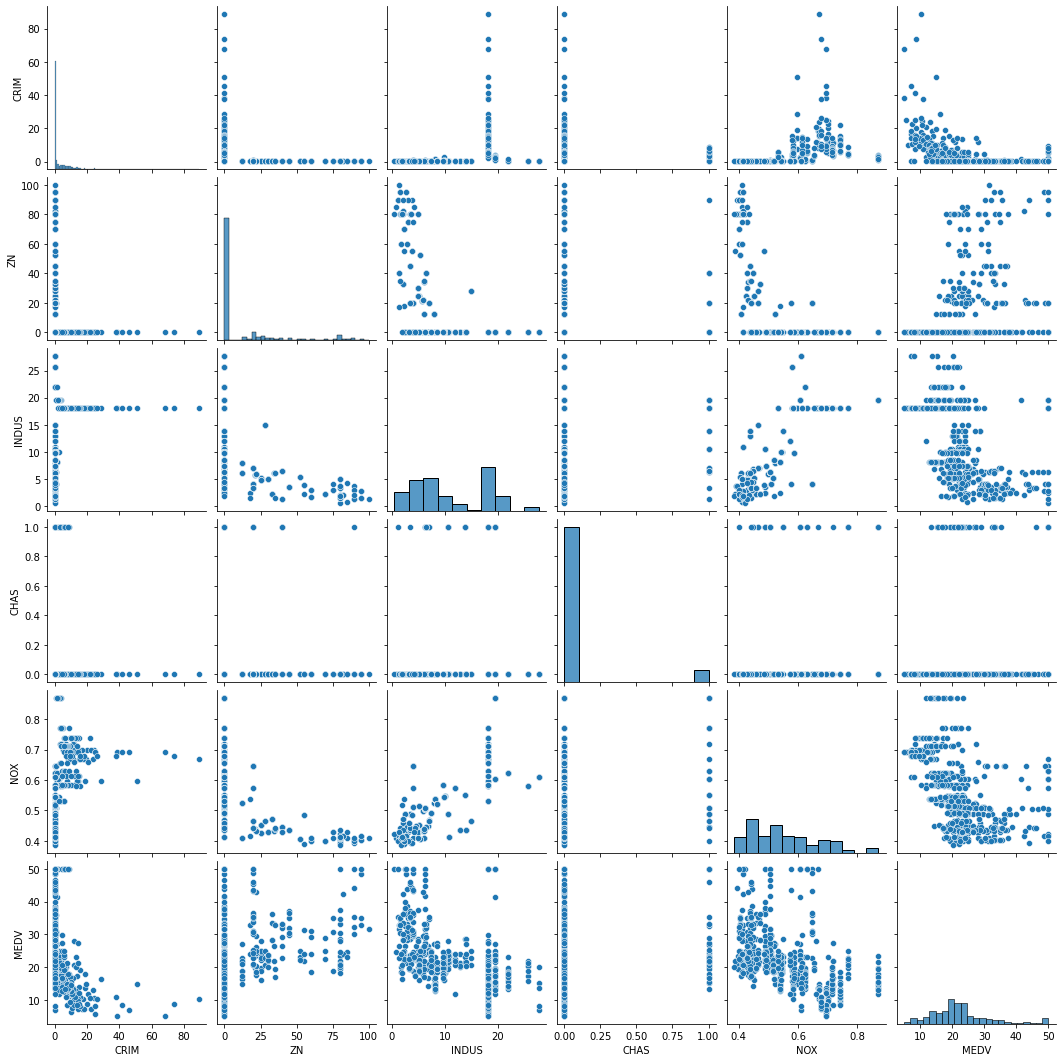

In [6]:
# pair plot a subset of the features - plotting the whole set is slow and hard to read.
sns.pairplot(boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'MEDV']]);

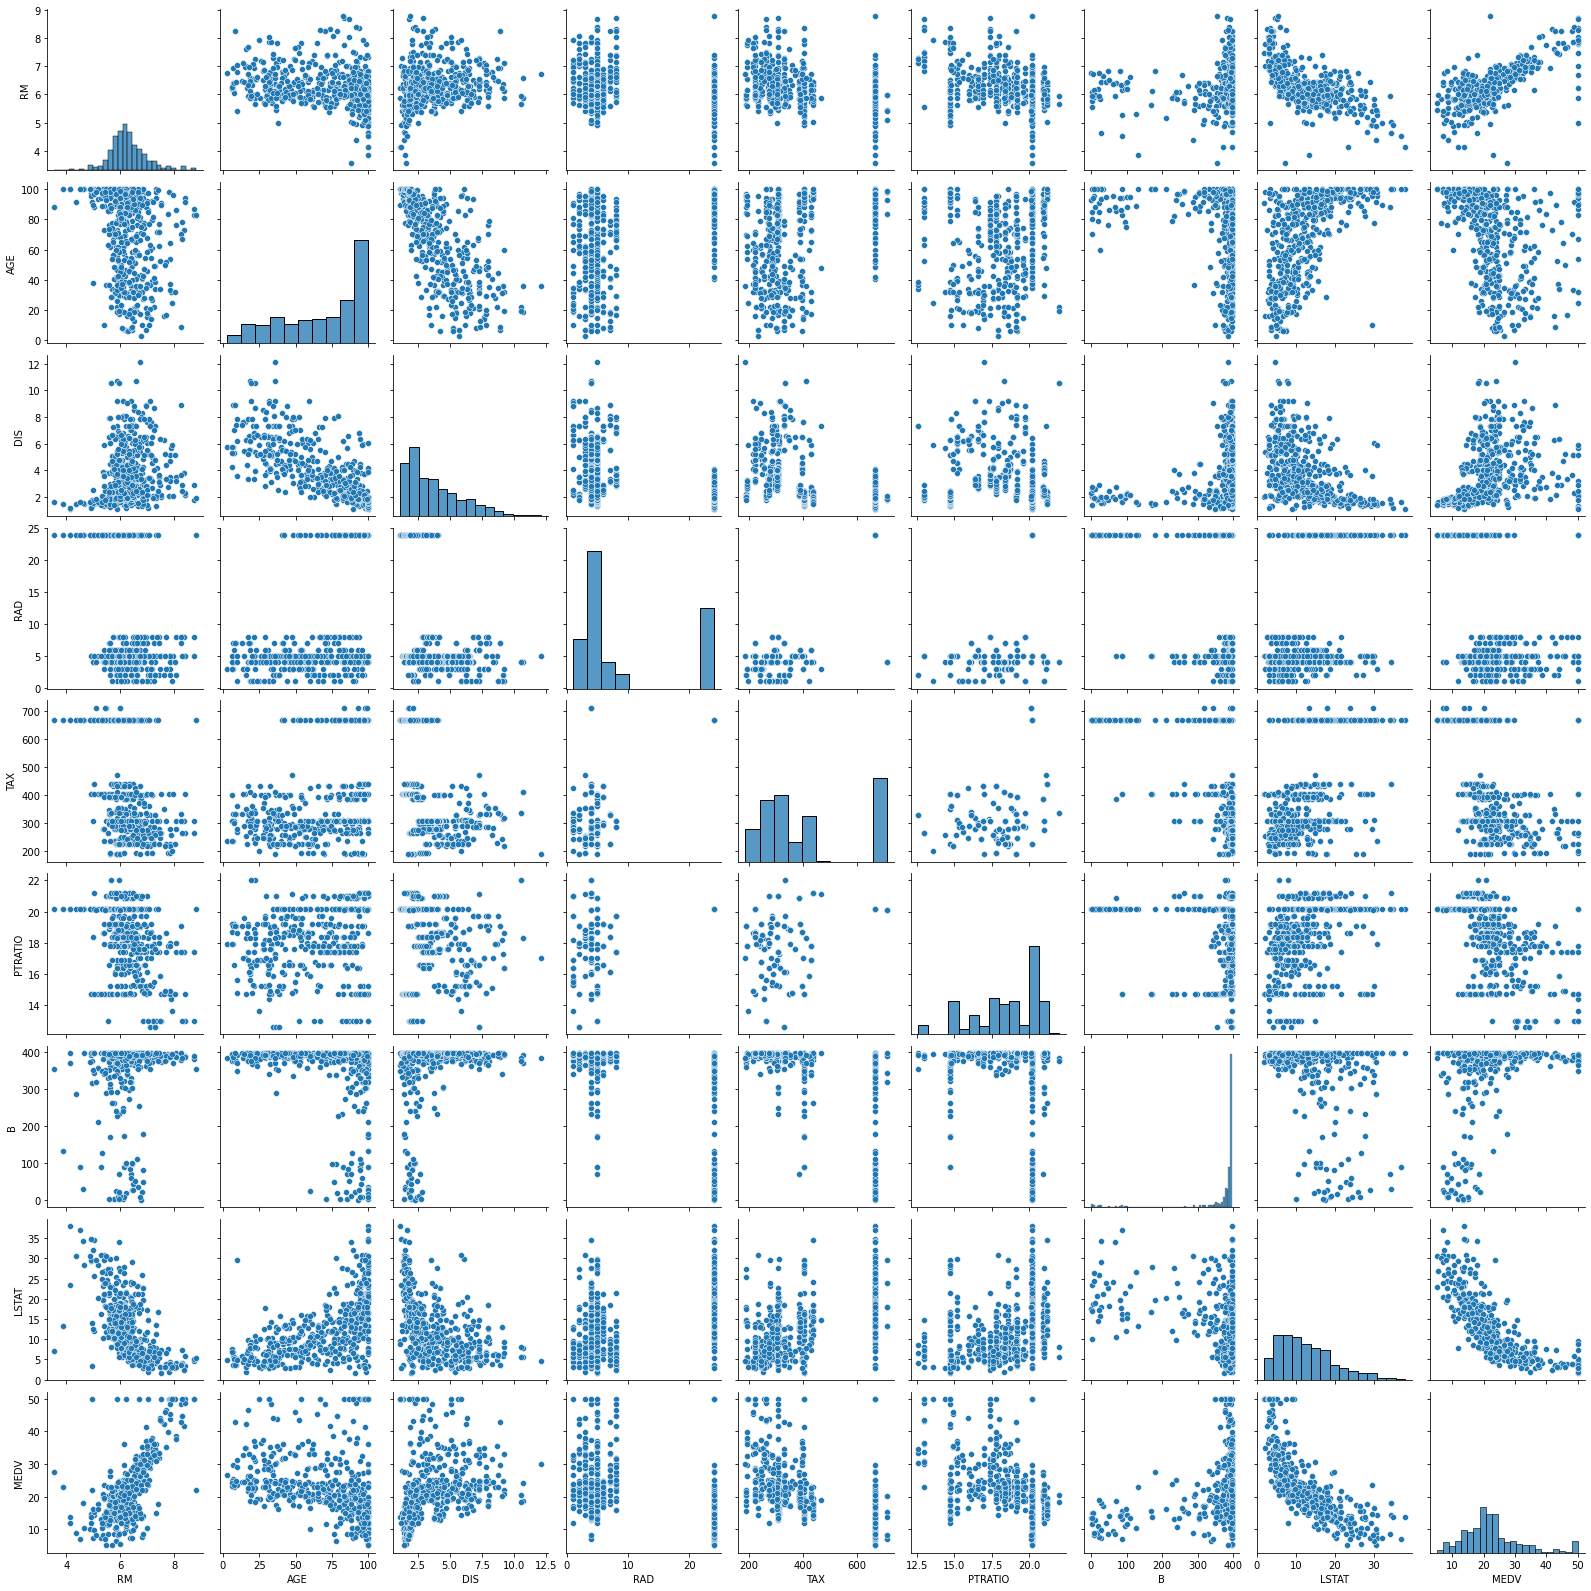

In [7]:
# pair plot a subset of the features - plotting the whole set is slow and hard to read.
sns.pairplot(boston_df[['RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]);

In [8]:
# Define our features and target - we'll drop NOX & INDUS from our features for this exercise.

X = boston_df.drop(['NOX','MEDV'], axis=1)
y = boston_df['MEDV']

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

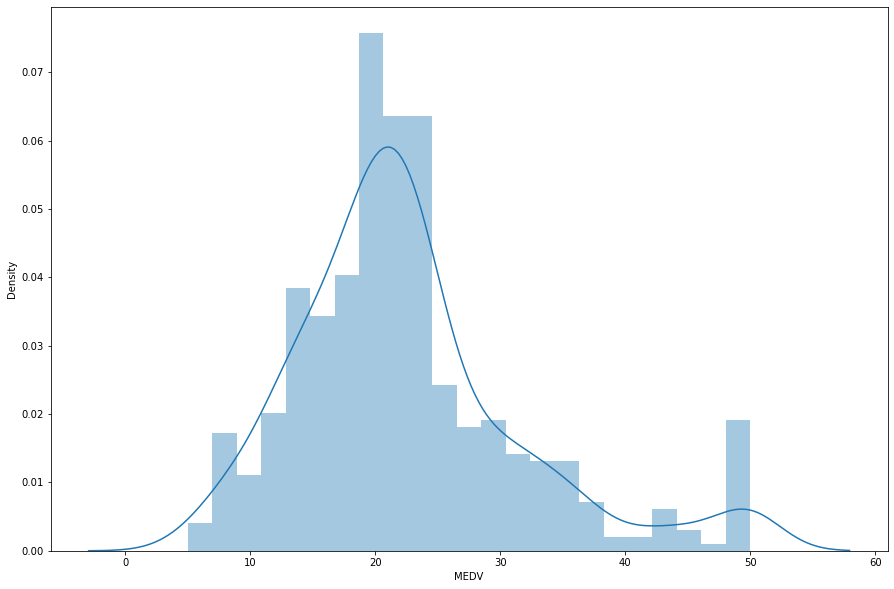

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(boston_df['MEDV'])

In [10]:
# train-test split using an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Instantiate
lr = LinearRegression()

# fit
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
## Take a look at our coefficients
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
CRIM,-0.113699
ZN,0.046963
INDUS,-0.057105
CHAS,2.393250
RM,3.881430
AGE,-0.019308
DIS,-1.158077
RAD,0.193616
TAX,-0.011977
PTRATIO,-0.878056


In [13]:
y_hat = lr.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df = compare_df.head(10)
df

,Actual,Predicted
329,22.6,25.001787
371,50.0,22.714122
219,23.0,28.692378
403,8.3,12.193014
78,21.2,20.187006
15,19.9,20.283930
487,20.6,19.852574
340,18.7,22.126583
310,16.1,19.091550
102,18.6,19.376433


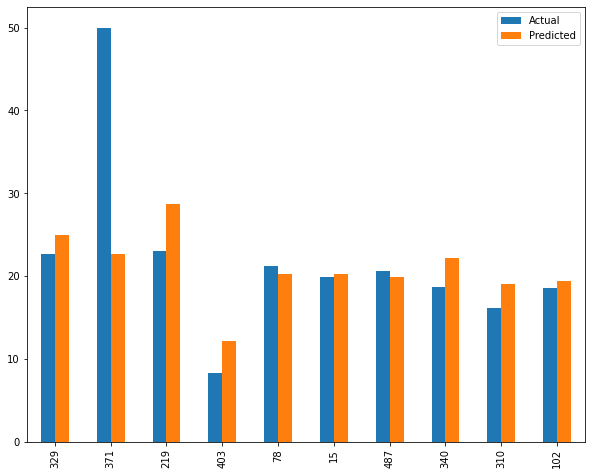

In [14]:
# plot the actual & predicted values
df.plot(kind='bar',figsize=(10,8))
plt.show()

In [15]:
lr_mae = mean_absolute_error(y_test, y_hat)
lr_mse = mean_squared_error(y_test, y_hat)
lr_rmse = np.sqrt(lr_mse)
print(f'Mean Absolute Error: {lr_mae:.4f}')  
print(f'Mean Squared Error: {lr_mse:.4f}')  
print(f'Root Mean Squared Error:  {lr_rmse:.4f}')

Mean Absolute Error: 3.9130
Mean Squared Error: 35.6567
Root Mean Squared Error:  5.9713


In [16]:
cv_5_results = cross_val_score(lr, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
print(f'Cross-validation Scores: {-cv_5_results}')
print( f'Mean RMSE CV=5: {np.mean(np.sqrt(-cv_5_results)):.4f} ')

Cross-validation Scores: [44.48230644 70.69108705 32.44758048 19.61200049 42.53582245]
Mean RMSE CV=5: 6.3448 


### Bonus Material: Regularization
---- 
**Regularization** is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them toward zero.
- It reduces model variance and thus minimizes overfitting.
- If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.

Our goal is to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex.

#### How Does Regularization Work?

For a normal linear regression model, we estimate the coefficients using the least squares criterion, which minimizes the residual sum of squares (RSS).

For a regularized linear regression model, we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.

**Ridge regression** (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ is the number of features.
- $\beta_j$ is a model coefficient.
- $\alpha$ is a tuning parameter:
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.

<a id="lasso-and-ridge-path-diagrams"></a>
#### Lasso and Ridge Path Diagrams

A larger alpha (toward the left of each diagram) results in more regularization:

- Lasso regression shrinks coefficients all the way to zero, thus removing them from the model.
- Ridge regression shrinks coefficients toward zero, but they rarely reach zero.

Source code for the diagrams: [Lasso regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html) and [Ridge regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

![Lasso and Ridge Coefficient Plots](../assets/lasso_ridge_path.png)

#### Advice for Applying Regularization

**Should features be standardized?**

- Yes, because otherwise, features would be penalized simply because of their scale.
- Also, standardizing avoids penalizing the intercept, which wouldn't make intuitive sense.

**How should you choose between lasso regression and ridge regression?**

- Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
- Ridge can work particularly well if there is a high degree of multicollinearity in your model.
- If model performance is your primary concern, it is best to try both.
- Elastic net regression is a combination of lasso regression and ridge Regression.

#### Ridge & Lasso w/ Cross-Validation

In [17]:
# Instantiate
ridgecv = RidgeCV(cv=10, scoring='neg_mean_squared_error')

#fit
ridgecv.fit(X_train, y_train)

# Let's look at the coefficients
ridge_coeff_df = pd.DataFrame(ridgecv.coef_, X.columns, columns=['Coefficient'])  
ridge_coeff_df

,Coefficient
CRIM,-0.113880
ZN,0.048859
INDUS,-0.056984
CHAS,1.737235
RM,3.549399
AGE,-0.016542
DIS,-1.165504
RAD,0.207024
TAX,-0.012579
PTRATIO,-0.896206


In [18]:
y_hat = ridgecv.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df = compare_df.tail(10)
df

,Actual,Predicted
254,21.9,24.938487
300,24.8,30.571670
505,11.9,23.054892
246,24.3,20.506178
374,13.8,-0.077159
56,24.7,26.185026
455,14.1,15.980270
60,18.7,18.063254
213,28.1,25.304814
108,19.8,21.833102


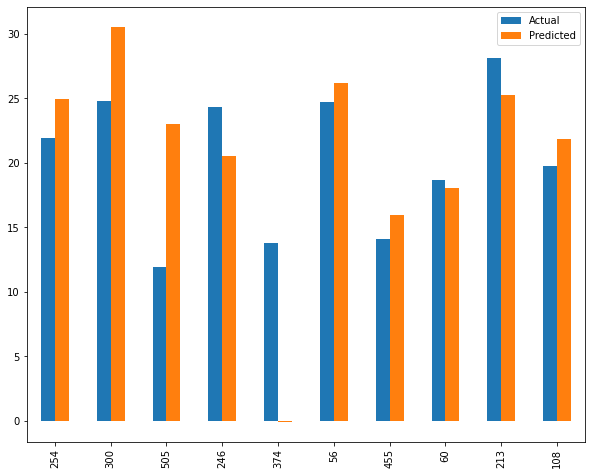

In [19]:
df.plot(kind='bar',figsize=(10,8))
plt.show()

In [20]:
ridge_mae = mean_absolute_error(y_test, y_hat)
ridge_mse = mean_squared_error(y_test, y_hat)
ridge_rmse = np.sqrt(ridge_mse)
print(f'Mean Absolute Error: {ridge_mae:.4f}')  
print(f'Mean Squared Error: {ridge_mse:.4f}')  
print(f'Root Mean Squared Error:  {ridge_rmse:.4f}')

Mean Absolute Error: 3.9369
Mean Squared Error: 35.8447
Root Mean Squared Error:  5.9870


In [21]:
lassocv = LassoCV(cv=5)

lassocv.fit(X_train, y_train)

lasso_coeff_df = pd.DataFrame(lassocv.coef_, X.columns, columns=['Coefficient'])  
lasso_coeff_df

,Coefficient
CRIM,-0.070580
ZN,0.052080
INDUS,-0.004050
CHAS,0.000000
RM,1.322182
AGE,0.009882
DIS,-0.747062
RAD,0.203463
TAX,-0.013970
PTRATIO,-0.873397


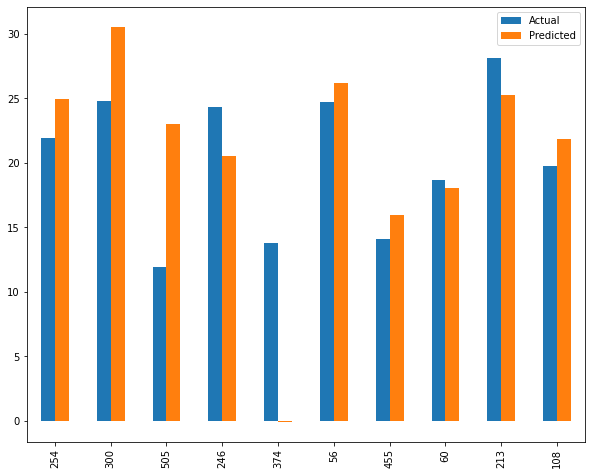

In [22]:
df.plot(kind='bar',figsize=(10,8))
plt.show()

In [23]:
y_hat = lassocv.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df = compare_df.head(10)
df

,Actual,Predicted
329,22.6,24.403449
371,50.0,23.702922
219,23.0,27.291028
403,8.3,14.208652
78,21.2,20.467533
15,19.9,22.116075
487,20.6,20.498518
340,18.7,23.638399
310,16.1,21.245822
102,18.6,19.905339


In [24]:
lasso_mae = mean_absolute_error(y_test, y_hat)
lasso_mse = mean_squared_error(y_test, y_hat)
lasso_rmse = np.sqrt(lasso_mse)
print(f'Mean Absolute Error: {lasso_mae:.4f}')  
print(f'Mean Squared Error: {lasso_mse:.4f}')  
print(f'Root Mean Squared Error:  {lasso_rmse:.4f}')

Mean Absolute Error: 4.1963
Mean Squared Error: 39.9031
Root Mean Squared Error:  6.3169


### Recursive feature Selection


In [25]:
selector = RFE(LinearRegression(), n_features_to_select = 5)
selector = selector.fit(X_train, y_train)

In [26]:
selected_bool_df = pd.DataFrame(selector.support_, columns=['mask'])
selected_rank_df = pd.DataFrame(selector.ranking_,columns=['rank'])
selected_df = pd.concat([selected_bool_df, selected_rank_df], axis=1)
selected_df.set_index(X.columns, inplace=True)
selected_df

,mask,rank
CRIM,False,3
ZN,False,4
INDUS,False,2
CHAS,True,1
RM,True,1
AGE,False,5
DIS,True,1
RAD,False,6
TAX,False,7
PTRATIO,True,1


In [27]:
# get the index and rank of the selected features
selected_df.reset_index(drop=True, inplace=True)
keep_features_bool = selected_df[selected_df['mask']]
keep_features = list(keep_features_bool.index)

# create dataframe of top 5 predictors

top5_features = X_train.iloc[:, keep_features]
top_5_col = list(top5_features.columns)
top5_features.head()

,CHAS,RM,DIS,PTRATIO,LSTAT
220,1.0,6.951,2.8617,17.4,9.71
71,0.0,5.961,5.2873,19.2,9.88
240,0.0,6.897,6.3361,16.6,11.38
6,0.0,6.012,5.5605,15.2,12.43
417,0.0,5.304,1.6475,20.2,26.64


In [28]:
lr.fit(top5_features,y_train)

LinearRegression()

In [29]:
y_hat = lr.predict(X_test[top_5_col])

In [30]:
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df = compare_df.head(10)
df

,Actual,Predicted
329,22.6,27.201037
371,50.0,23.119520
219,23.0,29.482441
403,8.3,12.916216
78,21.2,21.640953
15,19.9,20.153246
487,20.6,19.920570
340,18.7,20.941065
310,16.1,17.726861
102,18.6,21.801033


In [31]:
rfe_mae = mean_absolute_error(y_test, y_hat)
rfe_mse = mean_squared_error(y_test, y_hat)
rfe_rmse = np.sqrt(rfe_mse)
print(f'Mean Absolute Error: {rfe_mae:.4f}')  
print(f'Mean Squared Error: {rfe_mse:.4f}')  
print(f'Root Mean Squared Error:  {rfe_rmse:.4f}')

Mean Absolute Error: 4.2826
Mean Squared Error: 38.6195
Root Mean Squared Error:  6.2145


##### Compare Each Linear Regression Model

In [32]:
print("LR Error:")
print(f'Mean Absolute Error: {lr_mae:.4f}')  
print(f'Mean Squared Error: {lr_mse:.4f}')  
print(f'Root Mean Squared Error:  {lr_rmse:.4f}')
print()
print("Ridge Error:")
print(f'Mean Absolute Error: {ridge_mae:.4f}')  
print(f'Mean Squared Error: {ridge_mse:.4f}')  
print(f'Root Mean Squared Error:  {ridge_rmse:.4f}')
print()
print("Lasso Error:")
print(f'Mean Absolute Error: {lasso_mae:.4f}')  
print(f'Mean Squared Error: {lasso_mse:.4f}')  
print(f'Root Mean Squared Error:  {lasso_rmse:.4f}')
print()
print("RFE Error:")
print(f'Mean Absolute Error: {rfe_mae:.4f}')  
print(f'Mean Squared Error: {rfe_mse:.4f}')  
print(f'Root Mean Squared Error:  {rfe_rmse:.4f}')

LR Error:
Mean Absolute Error: 3.9130
Mean Squared Error: 35.6567
Root Mean Squared Error:  5.9713

Ridge Error:
Mean Absolute Error: 3.9369
Mean Squared Error: 35.8447
Root Mean Squared Error:  5.9870

Lasso Error:
Mean Absolute Error: 4.1963
Mean Squared Error: 39.9031
Root Mean Squared Error:  6.3169

RFE Error:
Mean Absolute Error: 4.2826
Mean Squared Error: 38.6195
Root Mean Squared Error:  6.2145


### Exercise - Linear Regression
Build a linear regression model for the diabetes data set (more info here). We'll use the sklearn built-in data set and load it for you. Your task is to build at least two linear regression models and determine which one works best. You are free to use any of the approaches demonstrated above to define your two models. That is, you can build a standard linear regression, use Ridge or Lasso or use RFE

#### Load the Diabetes Data
Load the [diabetes data](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) from the `sklearn datasets` module.

##### Data Dictionary
- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, T-Cells (a type of white blood cells)
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, thyroid stimulating hormone
- s5 ltg, lamotrigine
- s6 glu, blood sugar level
- target, disease progression one year after baseline

In [33]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X = pd.DataFrame(X, columns=diabetes.feature_names)
y = pd.Series(y, name='target')
diabetes_df = pd.concat([X,y], axis = 1)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


#### Build your models
The data is loaded - carry out a quick EDA, include a graph or two of the data. Then build your models using the above example as a guide. Do not reinvent the wheel.

In [34]:
# your code here
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [35]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [36]:
diabetes_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [37]:
# check for missing data. (There won't be any)
diabetes_df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

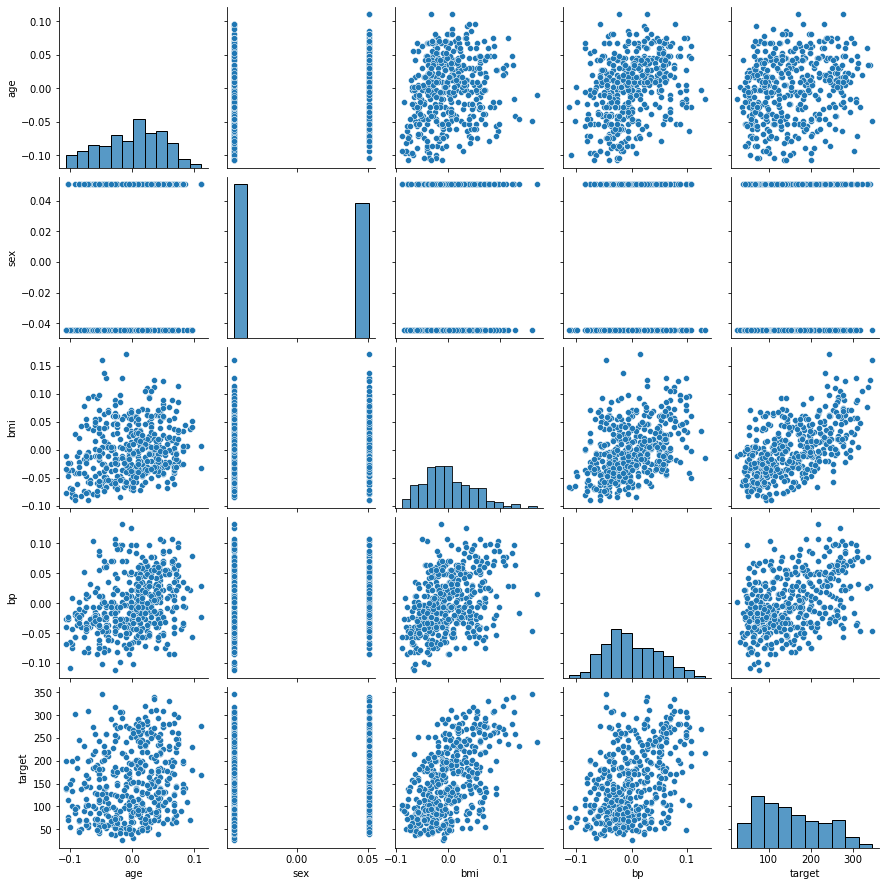

In [38]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp','target']]);

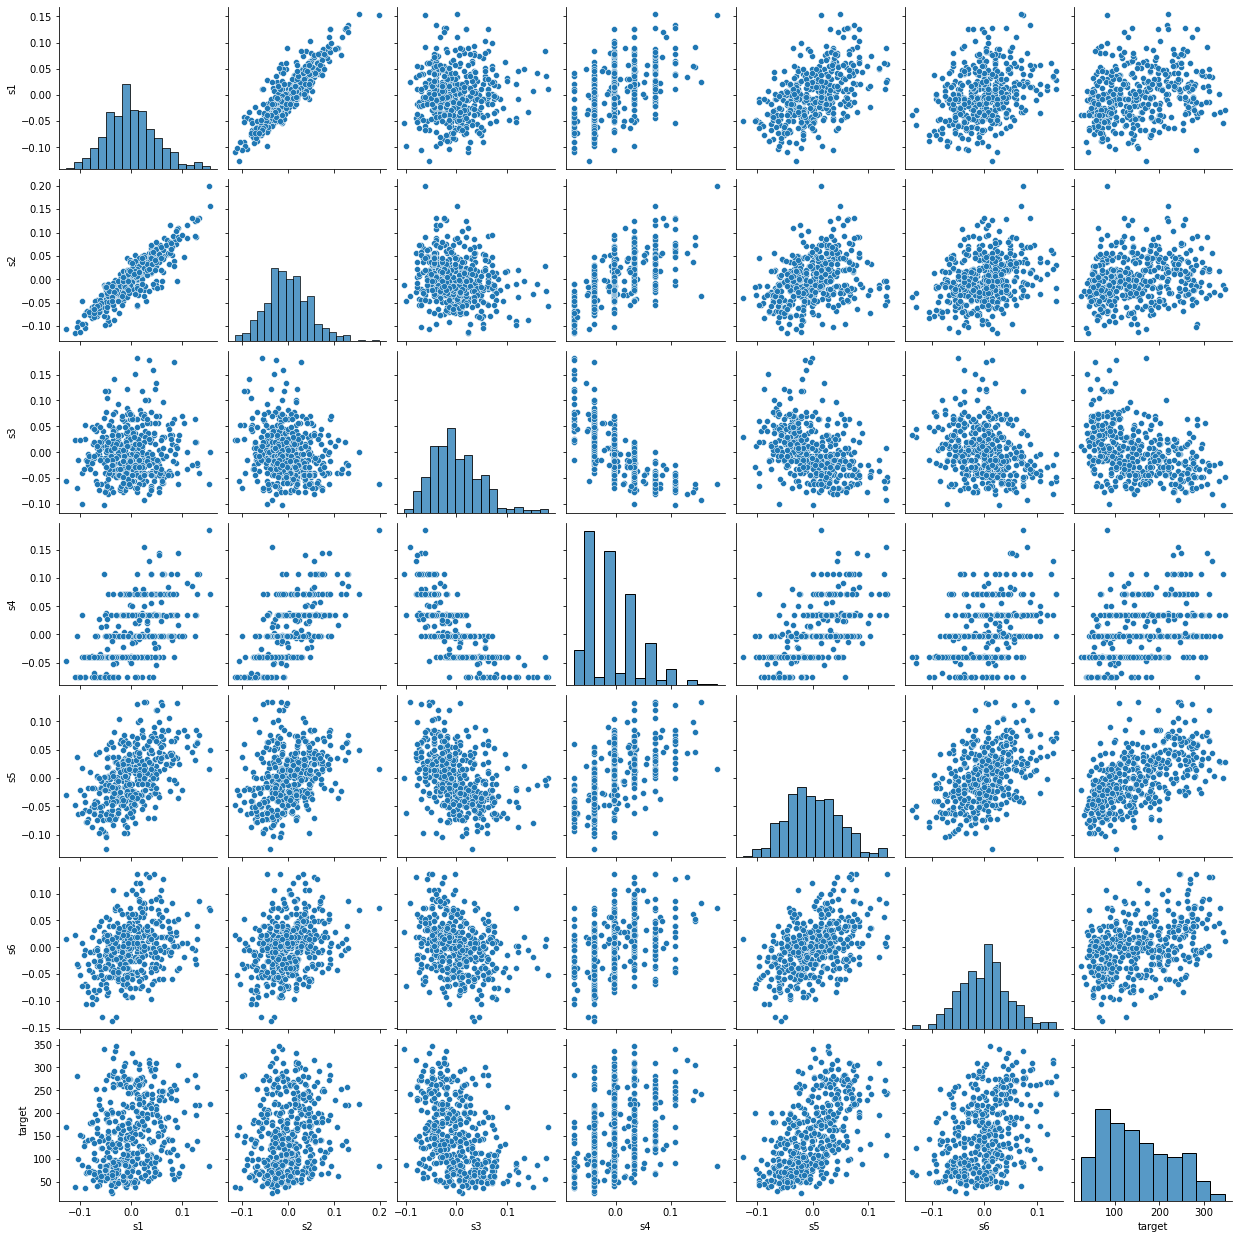

In [39]:
sns.pairplot(diabetes_df[['s1', 's2', 's3', 's4', 's5', 's6','target']]);


In [40]:
# Define our features and target - Drop NOX 

X = diabetes_df.drop(['target'], axis=1)
y = diabetes_df['target']

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


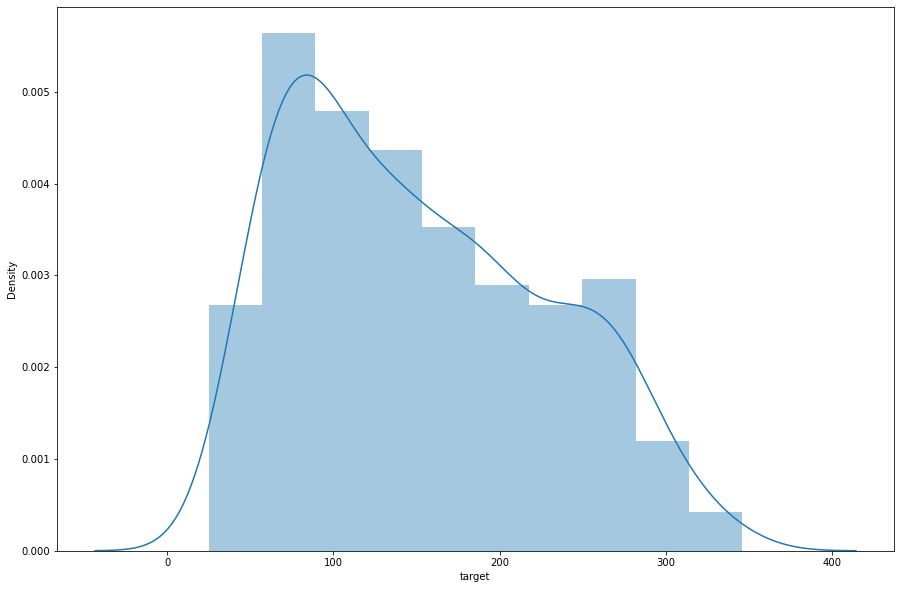

In [41]:
# plot the distribution of the target variable
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(diabetes_df['target']);

In [42]:
# train-test split using an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
# Instantiate
lr = LinearRegression()

# fit
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
## Take a look at our coefficients
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
age,-35.556837
sex,-243.169226
bmi,562.754046
bp,305.472030
s1,-662.787721
s2,324.275275
s3,24.781933
s4,170.330565
s5,731.678108
s6,43.028468


In [45]:
y_hat = lr.predict(X_test)

# not required
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
compare_df.head(10)

,Actual,Predicted
362,321.0,238.471452
249,215.0,248.931706
271,127.0,164.054042
435,64.0,120.307944
400,175.0,187.424221
403,275.0,259.048650
12,179.0,113.555564
399,232.0,188.075970
198,142.0,149.496634
205,99.0,236.010999


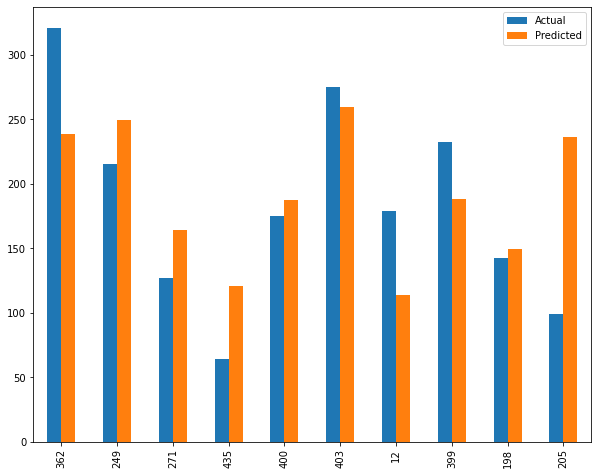

In [46]:
# plot the actual & predicted values
compare_df.head(10).plot(kind='bar',figsize=(10,8))
plt.show()

In [47]:
lr_mae = mean_absolute_error(y_test, y_hat)
lr_mse = mean_squared_error(y_test, y_hat)
lr_rmse = np.sqrt(lr_mse)
print(f'Mean Absolute Error: {lr_mae:.4f}')  
print(f'Mean Squared Error: {lr_mse:.4f}')  
print(f'Root Mean Squared Error:  {lr_rmse:.4f}')

Mean Absolute Error: 46.1742
Mean Squared Error: 3424.3167
Root Mean Squared Error:  58.5177


In [48]:
cv_5_results = cross_val_score(lr, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
print(f'Cross-validation Scores: {-cv_5_results}')
print()
print( f'Mean RMSE CV=5: {np.mean(np.sqrt(-cv_5_results)):.4f} ')

Cross-validation Scores: [3277.18866363 4514.1381962  2898.18841973 5135.88320412 3267.50805387]

Mean RMSE CV=5: 61.4192 


In [49]:
# Instantiate
ridgecv = RidgeCV(cv=10, scoring='neg_mean_squared_error')

#fit
ridgecv.fit(X_train, y_train)

# Let's look at the coefficients
ridge_coeff_df = pd.DataFrame(ridgecv.coef_, X.columns, columns=['Coefficient'])  
ridge_coeff_df

,Coefficient
age,-18.934016
sex,-205.959996
bmi,520.880611
bp,278.442222
s1,-81.883054
s2,-108.958761
s3,-209.976394
s4,117.758055
s5,457.624532
s6,69.002127


In [50]:
y_hat = ridgecv.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
compare_df.tail(10)

,Actual,Predicted
276,283.0,183.468915
188,141.0,148.758733
96,150.0,204.624878
170,47.0,60.939752
113,297.0,204.576624
381,104.0,79.101439
213,49.0,98.384186
134,103.0,141.640303
49,142.0,187.848392
52,59.0,132.775033


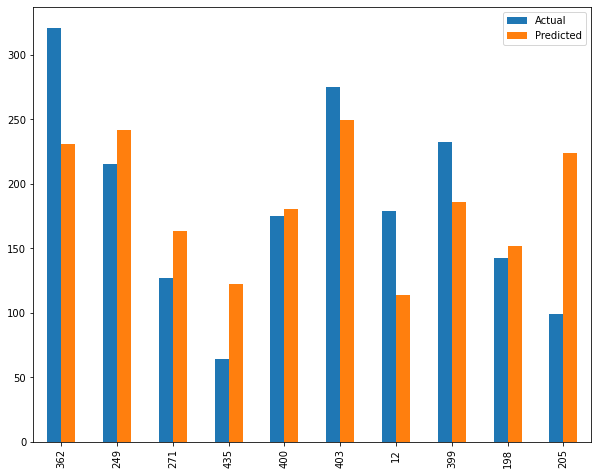

In [51]:
compare_df.head(10).plot(kind='bar',figsize=(10,8))
plt.show()

In [52]:
ridge_mae = mean_absolute_error(y_test, y_hat)
ridge_mse = mean_squared_error(y_test, y_hat)
ridge_rmse = np.sqrt(ridge_mse)
print(f'Mean Absolute Error: {ridge_mae:.4f}')  
print(f'Mean Squared Error: {ridge_mse:.4f}')  
print(f'Root Mean Squared Error:  {ridge_rmse:.4f}')

Mean Absolute Error: 45.6882
Mean Squared Error: 3372.6496
Root Mean Squared Error:  58.0745


In [53]:
lassocv = LassoCV(cv=5)

lassocv.fit(X_train, y_train)

lasso_coeff_df = pd.DataFrame(lassocv.coef_, X.columns, columns=['Coefficient'])  
lasso_coeff_df

,Coefficient
age,-19.476879
sex,-224.997883
bmi,567.698924
bp,286.919473
s1,-222.117196
s2,-0.000000
s3,-180.813655
s4,75.129202
s5,573.358408
s6,37.470703


In [54]:
y_hat = lassocv.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
compare_df.tail(10)

,Actual,Predicted
276,283.0,187.951571
188,141.0,148.854210
96,150.0,207.192877
170,47.0,51.950393
113,297.0,204.759234
381,104.0,76.089700
213,49.0,95.570486
134,103.0,144.573554
49,142.0,189.448964
52,59.0,131.794536


In [55]:
lasso_mae = mean_absolute_error(y_test, y_hat)
lasso_mse = mean_squared_error(y_test, y_hat)
lasso_rmse = np.sqrt(lasso_mse)
print(f'Mean Absolute Error: {lasso_mae:.4f}')  
print(f'Mean Squared Error: {lasso_mse:.4f}')  
print(f'Root Mean Squared Error:  {lasso_rmse:.4f}')

Mean Absolute Error: 46.1546
Mean Squared Error: 3435.3377
Root Mean Squared Error:  58.6118


In [56]:
print("LR Error:")
print(f'Mean Absolute Error: {lr_mae:.4f}')  
print(f'Mean Squared Error: {lr_mse:.4f}')  
print(f'Root Mean Squared Error:  {lr_rmse:.4f}')
print()
print("Ridge Error:")
print(f'Mean Absolute Error: {ridge_mae:.4f}')  
print(f'Mean Squared Error: {ridge_mse:.4f}')  
print(f'Root Mean Squared Error:  {ridge_rmse:.4f}')
print()
print("Lasso Error:")
print(f'Mean Absolute Error: {lasso_mae:.4f}')  
print(f'Mean Squared Error: {lasso_mse:.4f}')  
print(f'Root Mean Squared Error:  {lasso_rmse:.4f}')
print()

LR Error:
Mean Absolute Error: 46.1742
Mean Squared Error: 3424.3167
Root Mean Squared Error:  58.5177

Ridge Error:
Mean Absolute Error: 45.6882
Mean Squared Error: 3372.6496
Root Mean Squared Error:  58.0745

Lasso Error:
Mean Absolute Error: 46.1546
Mean Squared Error: 3435.3377
Root Mean Squared Error:  58.6118



**Ridge Regression gave us the best result**

## Classification
In this section we'll go over the fundamentals of classification problems.

## How to evaluate classifier performance?

A confusion matrix tells us several things. We'll discuss the confusion matrix in terms of a **_Binary Classification_** task. For this example, let's assume the model is used to predict whether or not someone has a disease. Recall that the confusion matrix provides four (4) primary pieces of information: 

**_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually have the disease (1).

**_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

**_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

**_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

Let's take a look at an example confusion matrix:

<img src='../images/index_9_0.png'>


## Confusion Metrics

**_Accuracy_** - proportion of all predictions that were correct.

$$ \text{Accuracy} = \frac{\text{True Positives + True Negatives}}{\text{Total}} $$ 

**_Precision_** - ratio of actual positives to all predicted positives. Out of all the times the model said someone had a disease, how many times did the patient in question actually have the disease?

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$

**_Sensitivity_** (_aka_ Recall)  - ratio of correct positives to all actual positives. This is also known as the True Positive Rate. Out of all the patients that actually had the disease, what percentage of them did our model correctly identify as having the disease? _[False Positives are acceptable, if all positives are caught.]_

$$ \text{Sensitivity} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $$

**_Specificity_** - ratio of correct negatives to all actual negative results. Out of all the patients that did not have the disease what percentage of them did our model correctly identify as not having the disease? _[False Positives are unacceptable, but False Negatives are ok.]_

$$ \text{Specificity} = \frac{\text{True Negatives}}{\text{True Negatives + False Positives}} $$

### F1 Score

The **_F1 Score_** is a bit more complicated, but it is a useful metric. Mathematically, **F1** is the harmonic mean of Recall (Sensitivity) and Precision (see formula below). What's nice about F1 as a measure is that it accounts for False Positives and False Negatives whereas accuracy does not. Furthermore, F1 can't be high unless both Recall and Precision are also high (remember this).

$$ \text{F1 Score} = 2\frac{\text{Recall x Precision}}{\text{Recall + Precision}} $$

F1 Scores fall between 0 and 1, with 1 being a perfect score and 0
Let's consider an example where we have two models. Model 1 has 99% recall and 8% precision. Model 2 has 90% recall and 80% precision

If we take the arithmetic mean of recall and precision for each model we get: 

$$ \text{Model 1:}\quad \frac{0.99 + 0.08}{2} = \frac{1.07}{2} = 0.535 = 53.5\%$$

$$ \text{Model 2:}\quad \frac{0.57 + 0.50}{2} = \frac{1.07}{2} = 0.535 = 53.5\%$$


However, using these numbers in the F1 score formula results in:

$$ \text{Model 1:}\quad \text{F1 score} = 2 \frac{0.99 * 0.08}{0.99 + 0.08} = 2 \frac{0.0792}{1.07} = 0.169488 = 16.9\%$$

$$ \text{Model 2:}\quad \text{F1 score} = 2 \frac{0.57 * 0.50}{0.57 + 0.50} = 2 \frac{0.285}{1.07} = 0.532710 = 53.3\%$$

As you can see, F1 score penalizes models heavily if it skews too much towards either precision or recall. F1 score is widely used, but does suffer from some issues, particularly with treating precision and recall equally and also for not taking True Negatives into account. F1 scores can be computed for multiclass problems, but is a more complicated.

## ROC & AUC

The *Receiver Operator Characteristic* curve (ROC curve) is a plot of the True Positive Rate vs the False Positive Rate. The False Positive Rate (FPR) is the ratio of false positives to all actual negatives:

$$ \text{False Positive Rate (FPR)} = \frac{\text{False Positives}}{\text{False Positives + True Negatives}} = 1 - \text{Specificity}$$

The ROC indicates the trade-off between Sensitivity (Recall) and Specificity.
In practice we want an ROC curve that's up towards the upper left corner of the graph. An ROC that's a straight line means 50-50 accuracy, and corresponds to classifier that is no better than flipping a coin.


<img src='../assets/ROC_image.png'>

AUC stands for *Area Under the Curve*, where the curve is the ROC curve. AUC is a measure of how well a classifier distinguishes between the target classes. A model with a higher AUC can distinguish the target classes better than a model with a lower AUC.
AUC = 1 corresponds to a perfect classifier while AUC = 0.5 is the 50-50 classifier mentioned above. It's easy to see that an ROC curve that bulges up to the left equates to a larger AUC.

# Model Review

We've covered 4 models so far in this course:
1. Linear Regression
2. Logisitic Regression
3. KNN
4. Decision Trees & Random Forests

We're going to cover 3 of these to demonstrate how to complete a simple data science project.
* What is Linear Regression used for?
* What is Logistic Regression used for?
* What is KNN used for?

Below we'll implement a simple model to refresh. Later you'll build your own.

## Guided Example: Logistic Regression

We're going to go through the standard modelling steps we've covered before. For this problem, are using the titanic dataset **titanic.csv**. We're going to train a logistic regression classifier on the dataset to determine whether a passenger survived or not.

*Don't forget to pick a random state*

In [57]:
# Load the data
titanic_df = pd.read_csv('../data/titanic.csv')
titanic_df.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [58]:
# define the columns to drop
drop_cols = ['PassengerId', 'Name','Embarked','Parch', 'Ticket','Cabin',]

# drop the columns
titanic_df.drop(columns=drop_cols, axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [59]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [60]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

### Create Dummy Variables
Above we see all the features are ```type``` object, so we need to create dummy variables.
* Create dummy variables for each feature. Remember to drop the first instance. 
* Assign the predictor and target variables 
* Split the data with an 80% for training and 20% for test data. Set ```random_state``` to 29 to ensure reproducibility.

In [61]:
# create dummy variables
ship_df = pd.get_dummies(titanic_df, drop_first=True)
ship_df.tail()

,Survived,Pclass,Age,SibSp,Fare,Sex_male
886,0,2,27.000000,0,13.00,1
887,1,1,19.000000,0,30.00,0
888,0,3,29.699118,1,23.45,0
889,1,1,26.000000,0,30.00,1
890,0,3,32.000000,0,7.75,1


In [62]:
# Assign feature and target variables
X = ship_df.drop(columns='Survived', axis=1)

y = ship_df['Survived']


# Train-test split use
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)


### Logistic Regression

Build a Linear Regression model using the following parameters:

- `fit_intercept` = False
- `C=1e12`
- `solver='liblinear'`

In [63]:
# Build the Model
# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(X_train, y_train)

# Predict on test set
y_logr_hat = logreg.predict(X_test)



### Build a KNN Model for Titanic Data
Now build a KNN model for the Titanic data.

In [64]:
## Build KNN model for Titanic data.

# Scale the data - because size matters
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # we fit and transfrom with the training data to avoid information leakage.
X_test_scaled = scaler.transform(X_test) # we have to transform the test data using the transform derived from the training data.

#Instantiate the classifier - You can try different values for n_neighbors to compare below or do a gridsearch
# Bonus Points if you use gridsearch to explore a range of values for k.

k_fixed = 3
knn = KNeighborsClassifier(n_neighbors=k_fixed)

model_knn = knn.fit(X_train_scaled, y_train)

# predict on the test set - remember to use scaled test data
y_knn_hat = knn.predict(X_test_scaled)


##### GridSearch
Here we'll use a quick gridsearch to find the best k, using accuracy as our metric.

In [65]:
# GridSearch
k_list = list(range(1,31)) # build list of 
param_grid = dict(n_neighbors=k_list) # alternative param_grid = {'n_neighbors': k_list}

knn_grid = KNeighborsClassifier()
# Instantiate
clf = GridSearchCV(knn_grid, param_grid, cv=10, scoring='accuracy', return_train_score=True)

# Fit the grid search classifier
model_clf = clf.fit(X_train_scaled, y_train)

# Fit the with the best estimator
y_clf_hat = clf.best_estimator_.predict(X_test_scaled)

In [66]:
# Let's look at the best score
mean_scores = clf.cv_results_['mean_test_score']
params = clf.cv_results_['params']

# Match up the k's and corresponding scores
knn_score = list(zip(mean_scores, params))

# print out the best one - we sorted this in descending order
print(f'Best K and accuracy: {sorted(knn_score, key=lambda x: x[0], reverse=True)[0]}')
knn_score

Best K and accuracy: (0.8023518769787426, {'n_neighbors': 12})


[(0.7558570782451379, {'n_neighbors': 1}),
 (0.7813885119855268, {'n_neighbors': 2}),
 (0.793306196291271, {'n_neighbors': 3}),
 (0.7858661239258253, {'n_neighbors': 4}),
 (0.7903889642695613, {'n_neighbors': 5}),
 (0.7843509724106739, {'n_neighbors': 6}),
 (0.8023292627770239, {'n_neighbors': 7}),
 (0.7888285843509724, {'n_neighbors': 8}),
 (0.7948891904115784, {'n_neighbors': 9}),
 (0.7949344188150157, {'n_neighbors': 10}),
 (0.7948665762098598, {'n_neighbors': 11}),
 (0.8023518769787426, {'n_neighbors': 12}),
 (0.7948665762098598, {'n_neighbors': 13}),
 (0.7933740388964269, {'n_neighbors': 14}),
 (0.7859791949344187, {'n_neighbors': 15}),
 (0.7874491180461329, {'n_neighbors': 16}),
 (0.7859565807327, {'n_neighbors': 17}),
 (0.7828810492989597, {'n_neighbors': 18}),
 (0.7709633649932157, {'n_neighbors': 19}),
 (0.7814111261872456, {'n_neighbors': 20}),
 (0.7725011307100859, {'n_neighbors': 21}),
 (0.777001356852103, {'n_neighbors': 22}),
 (0.7740162822252374, {'n_neighbors': 23}),
 (

## Confusion Matrix

Compute the confusion matrix.

In [67]:
# get confusion matrix log reg
cm_log = confusion_matrix(y_test, y_logr_hat)

# get confusion matrix for knn & gridsearch best estimator
cm_knn = confusion_matrix(y_test, y_knn_hat)

cm_clf = confusion_matrix(y_test, y_clf_hat)

print('Confusion Matrix Log Reg: \n', cm_log)
print()
print('Confusion Matrix KNN: \n', cm_knn)
print()
print('Confusion Matrix KNN: \n', cm_clf)

Confusion Matrix Log Reg: 
 [[114  15]
 [ 30  64]]

Confusion Matrix KNN: 
 [[115  14]
 [ 20  74]]

Confusion Matrix KNN: 
 [[117  12]
 [ 28  66]]


In [68]:
# Define a function to compute confusion matrix metrics.

def cm_metrics(cm, to_print=True):
    """Function to compute metrics from a binary confusion matrix and print results
    Args:
        cm : binary confusion matrix
        
    Returns:
        six (6) values - accuracy, precision, sensitivity, specificity, F1, fpr (1- specificity)
    """
    # Confusion matrix for logistic regression
    tn, fp, fn, tp =  cm.ravel()

    # Compute Accuracy, Precision, Sensitivty, Specificity, F1 & FPR

    acc = (tp+tn)/(tn+fp+fn+tp)
    prec = tp/(tp+fp)
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    F1 = 2 * (sens * prec)/(sens + prec)
    fpr = 1 - spec
    
    if to_print:
        print('Accuracy: {:0.3f}'.format(acc))
        print('Precision: {:0.3f}'.format(prec))
        print('Sensitivity: {:0.3f}'.format(sens))
        print('Specificity: {:0.3f}'.format(spec))
        print('F1 Score: {:0.3f}'.format(F1))
        print('False Positive Rate: {:0.3f}'.format(fpr))
        print()
    
    return acc, prec, sens, spec, F1, fpr

In [69]:
print('**************************************')
print('***** KNN vs Logistic Regression *****')
print('**************************************')
print()

print("Confusion Matrix Metrics - Logistic Regression:")
print('-----------------------------------------------')
accuracy, precision, sensitivity, specificity, F1, fpr = cm_metrics(cm_log)

print("Confusion Matrix Metrics - KNN:")
print('-------------------------------')
accuracy, precision, sensitivity, specificity, F1, fpr = cm_metrics(cm_knn)

print("Confusion Matrix Metrics - KNN Grid:")
print('-------------------------------')
accuracy, precision, sensitivity, specificity, F1, fpr = cm_metrics(cm_clf)

print()
# compute precision and recall (sensitivity) using sklearn
print("sklearn Confusion Matrix Metrics - Logistic Regression:")
print('-------------------------------------------------------')

acc = accuracy_score(y_test, y_logr_hat)
prec = precision_score(y_test, y_logr_hat)
rec = recall_score(y_test, y_logr_hat)
print('Accuracy =', round(acc,3))
print('Precision =', round(prec,3))
print('Recall =', round(rec,3))
print()

# compute precision and recall (sensitivity) using sklearn
print("sklearn Confusion Matrix Metrics - KNN:")
print('---------------------------------------')

acc = accuracy_score(y_test, y_knn_hat)
prec = precision_score(y_test, y_knn_hat)
rec = recall_score(y_test, y_knn_hat)
print('Accuracy =', round(acc,3))
print('Precision =', round(prec,3))
print('Recall =', round(rec,3))
print()


# compute precision and recall (sensitivity) using sklearn
print("sklearn Confusion Matrix Metrics - KNN Grid:")
print('---------------------------------------')

acc = accuracy_score(y_test, y_clf_hat)
prec = precision_score(y_test, y_clf_hat)
rec = recall_score(y_test, y_clf_hat)
print('Accuracy =', round(acc,3))
print('Precision =', round(prec,3))
print('Recall =', round(rec,3))
print()



**************************************
***** KNN vs Logistic Regression *****
**************************************

Confusion Matrix Metrics - Logistic Regression:
-----------------------------------------------
Accuracy: 0.798
Precision: 0.810
Sensitivity: 0.681
Specificity: 0.884
F1 Score: 0.740
False Positive Rate: 0.116

Confusion Matrix Metrics - KNN:
-------------------------------
Accuracy: 0.848
Precision: 0.841
Sensitivity: 0.787
Specificity: 0.891
F1 Score: 0.813
False Positive Rate: 0.109

Confusion Matrix Metrics - KNN Grid:
-------------------------------
Accuracy: 0.821
Precision: 0.846
Sensitivity: 0.702
Specificity: 0.907
F1 Score: 0.767
False Positive Rate: 0.093


sklearn Confusion Matrix Metrics - Logistic Regression:
-------------------------------------------------------
Accuracy = 0.798
Precision = 0.81
Recall = 0.681

sklearn Confusion Matrix Metrics - KNN:
---------------------------------------
Accuracy = 0.848
Precision = 0.841
Recall = 0.787

sklearn Confus

In [70]:
# Calculate the probability scores of each point in the training set Logistic Regression
y_train_score_log = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr_log, train_tpr_log, thresholds_log = roc_curve(y_train, y_train_score_log)

# Calculate the probability scores of each point in the test set
y_test_score_log = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr_log, test_tpr_log, test_thresholds_log = roc_curve(y_test, y_test_score_log)

# Compute AUC
auc_train_log = auc(train_fpr_log, train_tpr_log)
auc_test_log = auc(test_fpr_log, test_tpr_log)




In [71]:
# KNN scores
# Calculate the probability scores of each point in the training set
y_train_score_knn = model_knn.predict_proba(X_train_scaled)[:,1]
y_train_score_clf = model_clf.predict_proba(X_train_scaled)[:,1]


# Calculate the fpr, tpr, and thresholds for the training set
train_fpr_knn, train_tpr_knn, thresholds_knn = roc_curve(y_train, y_train_score_knn)
train_fpr_clf, train_tpr_clf, thresholds_clf = roc_curve(y_train, y_train_score_clf)

# Calculate the probability scores of each point in the test set
y_test_score_knn = model_knn.predict_proba(X_test_scaled)[:,1]
y_test_score_clf = model_clf.predict_proba(X_test_scaled)[:,1]

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr_knn, test_tpr_knn, test_thresholds_knn = roc_curve(y_test, y_test_score_knn)
test_fpr_clf, test_tpr_clf, test_thresholds_knn = roc_curve(y_test, y_test_score_knn)

# Compute AUC
auc_train_knn = auc(train_fpr_knn, train_tpr_knn)
auc_test_knn = auc(test_fpr_knn, test_tpr_knn)

# Compute AUC
auc_train_clf = auc(train_fpr_clf, train_tpr_clf)
auc_test_clf = auc(test_fpr_clf, test_tpr_clf)

Training AUC Log Reg: 0.813
Training AUC KNN: 0.957
Test AUC Log Reg: 0.831
Test AUC KNN: 0.848


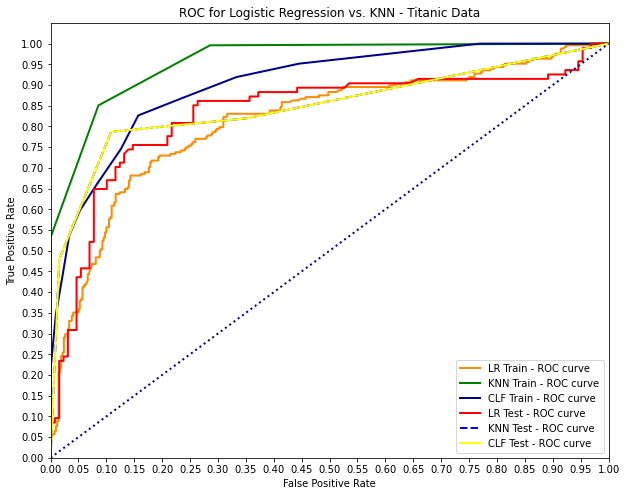

In [72]:
# ROC curve for Training
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr_log, train_tpr_log, color='darkorange',
         lw=lw, label='LR Train - ROC curve')

plt.plot(train_fpr_knn, train_tpr_knn, color='green',
         lw=lw, label='KNN Train - ROC curve')

plt.plot(train_fpr_clf, train_tpr_clf, color='darkblue',
         lw=lw, label='CLF Train - ROC curve')

plt.plot(test_fpr_log, test_tpr_log, color='red',
         lw=lw, label='LR Test - ROC curve')

plt.plot(test_fpr_knn, test_tpr_knn, color='blue',
         lw=lw, label='KNN Test - ROC curve', linestyle='--')

plt.plot(test_fpr_clf, test_tpr_clf, color='yellow',
         lw=lw, label='CLF Test - ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression vs. KNN - Titanic Data')
plt.legend(loc='lower right')
print('Training AUC Log Reg: {:0.3f}'.format(auc_train_log))
print('Training AUC KNN: {:0.3f}'.format(auc_train_knn))
print('Test AUC Log Reg: {:0.3f}'.format(auc_test_log))
print('Test AUC KNN: {:0.3f}'.format(auc_test_knn))
plt.show()

## Build and Compare
[*Note: The solution above shows how to use both logistic regression and KNN to perform a classification task and generate metrics to compare the two results. Notice that for KNN we use the ```predict_proba()``` method to get the probabilities for a postive result and we use ```decision_function()``` to get the analogous threshold values for the logistic regression model. Check the sklearn documentation for more information on these two methods.*]

**If you have trouble with the in-class exercise. Repeat it for homework using the above approach as an example.**

You will be using the iris dataset from sklearn. You can access this data using the ```load_iris``` module. Note, you can assign the data to ```X,y``` if you set the argument ```return_X_y=True```. Also, you can read this data in as a dataframe, by setting the argument ```as_frame=True```. See the documentation at [sklearn iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).

Your in-class task is the following:

1. Load the iris data as a dataframe. The target will be loaded separatley as a Series.
2. Use the `.map()` method to bundle the three classes (0,1,2) into two classes (0,1).
    1. Here you will map classes (0,1) into 0, and class 2 into 1. See this [Pandas Doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) for examples.
3. Concatenate the features and target into a single dataframe.
4. Perform a quick EDA.
5. build two classifiers to analyze the iris data. Find the best parameter for KNN where possible (Don't bother with Logistic Regression, just use `C=1e12`.
    * Logistic Regression
    * KNN
6. Compare the two models using confusion matrix metrics and ROC-AUC
7. Identify the best model based on appropriate criteria, explain your choice.

Note: write nice clean code, comment your code, write docstrings for any functions you write.

In [73]:
# Load the data - 
# Name the feature columns as ['sepal length', 'sepal width', 'petal length', 'petal width']
# Name the target - 'species'

X, y = load_iris(return_X_y=True)

X = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
y = pd.Series(y, name='species')

In [74]:
# concatenate the X & y & verify
iris_df = pd.concat([X,y], axis=1)
iris_df.head(2)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [75]:
# Map the three classes into two classes.
iris_df['species'] = iris_df['species'].map({0:0, 1:0, 2:1})

iris_df.tail()

,sepal length,sepal width,petal length,petal width,species
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [76]:
# check the info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [77]:
# summary stats
iris_df.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


In [78]:
# check if our data is imbalanced
iris_df['species'].value_counts()

0    100
1     50
Name: species, dtype: int64

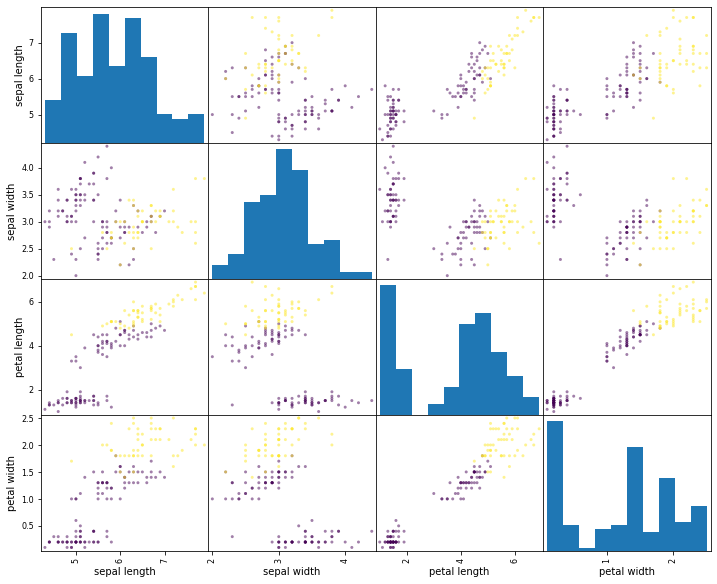

In [79]:
# Make some plots to further explore the data
pd.plotting.scatter_matrix(iris_df.drop('species', axis=1), c=iris_df['species'], figsize=(12, 10));

##### Set up the data
Assign `X` and `y` and do a train test split.

In [80]:
X = iris_df.drop('species', axis = 1)
y = iris_df['species']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=99)

##### Logistic Regression

In [82]:
# Build the Log Reg Model
# Instantiate
logreg = LogisticRegression(C=1e12, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(X_train, y_train)

# Predict on test set
y_logr_hat = model_log.predict(X_test)

##### KNN

In [83]:
# Build the KNN Model

# Scale the data - because size matters
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Instantiate the classifier - You can try different values for n_neighbors to compare below.
# Or use gridsearch to explore a range of values for k.
knn = KNeighborsClassifier()

# Fit the model to training data
model_knn = knn.fit(X_train_scaled, y_train)

# predict on the test set - remember to use scaled test data
# uncomment if using standard KNN
y_knn_hat = knn.predict(X_test_scaled)

##### GridSearch

In [84]:
# GridSearch
k_list = list(range(1,31)) # build list of 
param_grid = dict(n_neighbors=k_list) # alternative param_grid = {'n_neighbors': k_list}

# Instantiate
clf = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)

# Fit the grid search classifier
model_clf = clf.fit(X_train_scaled, y_train)

# Predict -
y_clf_hat = clf.best_estimator_.predict(X_test_scaled)

In [85]:
# What is the best k
clf.best_params_

{'n_neighbors': 11}

In [86]:
# Replace y_clf_hat with y_knn_hat if using standard knn
y_hat = y_clf_hat

In [87]:
# get confusion matrix log reg
cm_log = confusion_matrix(y_test, y_logr_hat)

# get confusion matrix for knn
cm_knn = confusion_matrix(y_test, y_hat)

print('Confusion Matrix Log Reg: \n', cm_log)
print()
print('Confusion Matrix KNN: \n', cm_knn)

Confusion Matrix Log Reg: 
 [[28  2]
 [ 0 15]]

Confusion Matrix KNN: 
 [[29  1]
 [ 0 15]]


In [88]:
print('**************************************')
print('***** KNN vs Logistic Regression *****')
print('**************************************')
print()

print("Confusion Matrix Metrics - Logistic Regression:")
print('-----------------------------------------------')
accuracy, precision, sensitivity, specificity, F1, fpr = cm_metrics(cm_log)

print("Confusion Matrix Metrics - KNN:")
print('-------------------------------')
accuracy, precision, sensitivity, specificity, F1, fpr = cm_metrics(cm_knn)

print()
# compute precision and recall (sensitivity) using sklearn
print("sklearn Confusion Matrix Metrics - Logistic Regression:")
print('-------------------------------------------------------')

acc = accuracy_score(y_test, y_logr_hat)
prec = precision_score(y_test, y_logr_hat)
rec = recall_score(y_test, y_logr_hat)
print('Accuracy =', round(acc,3))
print('Precision =', round(prec,3))
print('Recall =', round(rec,3))
print()

# compute precision and recall (sensitivity) using sklearn
print("sklearn Confusion Matrix Metrics - KNN:")
print('---------------------------------------')

acc = accuracy_score(y_test, y_knn_hat)
prec = precision_score(y_test, y_knn_hat)
rec = recall_score(y_test, y_knn_hat)
print('Accuracy =', round(acc,3))
print('Precision =', round(prec,3))
print('Recall =', round(rec,3))
print()





**************************************
***** KNN vs Logistic Regression *****
**************************************

Confusion Matrix Metrics - Logistic Regression:
-----------------------------------------------
Accuracy: 0.956
Precision: 0.882
Sensitivity: 1.000
Specificity: 0.933
F1 Score: 0.938
False Positive Rate: 0.067

Confusion Matrix Metrics - KNN:
-------------------------------
Accuracy: 0.978
Precision: 0.938
Sensitivity: 1.000
Specificity: 0.967
F1 Score: 0.968
False Positive Rate: 0.033


sklearn Confusion Matrix Metrics - Logistic Regression:
-------------------------------------------------------
Accuracy = 0.956
Precision = 0.882
Recall = 1.0

sklearn Confusion Matrix Metrics - KNN:
---------------------------------------
Accuracy = 0.978
Precision = 0.938
Recall = 1.0



In [89]:
# Calculate the probability scores of each point in the training set Logistic Regression
y_train_score_log = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr_log, train_tpr_log, thresholds_log = roc_curve(y_train, y_train_score_log)

# Calculate the probability scores of each point in the test set
y_test_score_log = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr_log, test_tpr_log, test_thresholds_log = roc_curve(y_test, y_test_score_log)

# Compute AUC
auc_train_log = auc(train_fpr_log, train_tpr_log)
auc_test_log = auc(test_fpr_log, test_tpr_log)


# KNN scores
# Calculate the probability scores of each point in the training set
y_train_score_knn = model_knn.predict_proba(X_train_scaled)[:,1]

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr_knn, train_tpr_knn, thresholds_knn = roc_curve(y_train, y_train_score_knn)

# Calculate the probability scores of each point in the test set
y_test_score_knn = model_knn.predict_proba(X_test_scaled)[:,1]

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr_knn, test_tpr_knn, test_thresholds_knn = roc_curve(y_test, y_test_score_knn)

# Compute AUC
auc_train_knn = auc(train_fpr_knn, train_tpr_knn)
auc_test_knn = auc(test_fpr_knn, test_tpr_knn)

In [90]:
auc_train_knn

0.9938775510204081

Training AUC Log Reg: 0.999
Training AUC KNN: 0.994
Test AUC Log Reg: 1.000
Test AUC KNN: 1.000


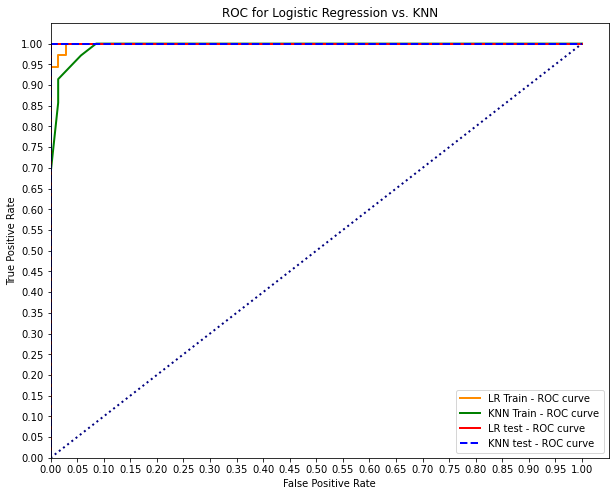

In [91]:
# ROC curve for Training
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr_log, train_tpr_log, color='darkorange',
         lw=lw, label='LR Train - ROC curve')
plt.plot(train_fpr_knn, train_tpr_knn, color='green',
         lw=lw, label='KNN Train - ROC curve')
plt.plot(test_fpr_log, test_tpr_log, color='red',
         lw=lw, label='LR test - ROC curve')
plt.plot(test_fpr_knn, test_tpr_knn, color='blue',
         lw=lw, label='KNN test - ROC curve', linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle=':')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression vs. KNN')
plt.legend(loc='lower right')
print('Training AUC Log Reg: {:0.3f}'.format(auc_train_log))
print('Training AUC KNN: {:0.3f}'.format(auc_train_knn))
print('Test AUC Log Reg: {:0.3f}'.format(auc_test_log))
print('Test AUC KNN: {:0.3f}'.format(auc_test_knn))
plt.show()

**What Conclusions can you make?**

Answer: It looks like KNN is a better classifier, based on accuracy, than logistic regression for the iris dataset. AUC for both is very high, which means our classifer is good at distinguishing between the two classes.

*Note: the data was deliberately set up to provide some distinction between the performance of the two models.*